In [1]:
import os,sys,inspect
sys.path.append("..\\")

import vrpSolver

## Use `geoJSON` to create road network

In this notebook, we are going to use local `geoJSON` file to 
- Create road network
- Display road network
- Randomly sample customers locations on road network/residential area

### 0. Preparation

To use `geoJSON` functions, we need to download the `geoJSON` files. Typically, we can get`geoJSON` file from OpenStreetMap website.
Ref: https://wiki.openstreetmap.org/wiki/Downloading_data

In this demo, we are using a `geoJSON` file of Buffalo, NY, U.S. (Jan. 20, 2022)

In [27]:
cityName = 'Xiamen'

In [9]:
geoJSONPath = "../data/%s.geojson" % cityName

### 1. Read highways fron `geoJSON` file
catergorize by motorway, country level roads, residential streets

In [10]:
network = vrpSolver.createRoadNetworkFromGeoJSON(
    geoJSONPath = geoJSONPath)

In [25]:
vrpSolver.saveDictionary(network, cityName)

In [28]:
network = vrpSolver.loadDictionary("../data/%s" % cityName)

### 2. Randomly (uniformly) create customers on residential roads

In [34]:
poly = [[24.550558357983217, 118.08431625366208],
 [24.564454255248982, 118.11161041259763],
 [24.56663998654322, 118.1486892700195],
 [24.548060055856265, 118.18353652954099],
 [24.516670897942557, 118.21306228637692],
 [24.469025602689495, 118.20413589477536],
 [24.412765325831455, 118.13169479370114],
 [24.433084432919536, 118.07521820068357],
 [24.44652450497289, 118.07367324829099],
 [24.459806888962795, 118.0637168884277],
 [24.47652507526857, 118.06251525878906],
 [24.5271348225978, 118.07744979858396]]

#### 2.1 Inside a polygon

In [35]:
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = {
        'method': "RoadNetworkPolyLatLon",
        'roadNetwork': network['road'],
        'polyLatLon': poly,
        'roadClass': ['residential']
    })

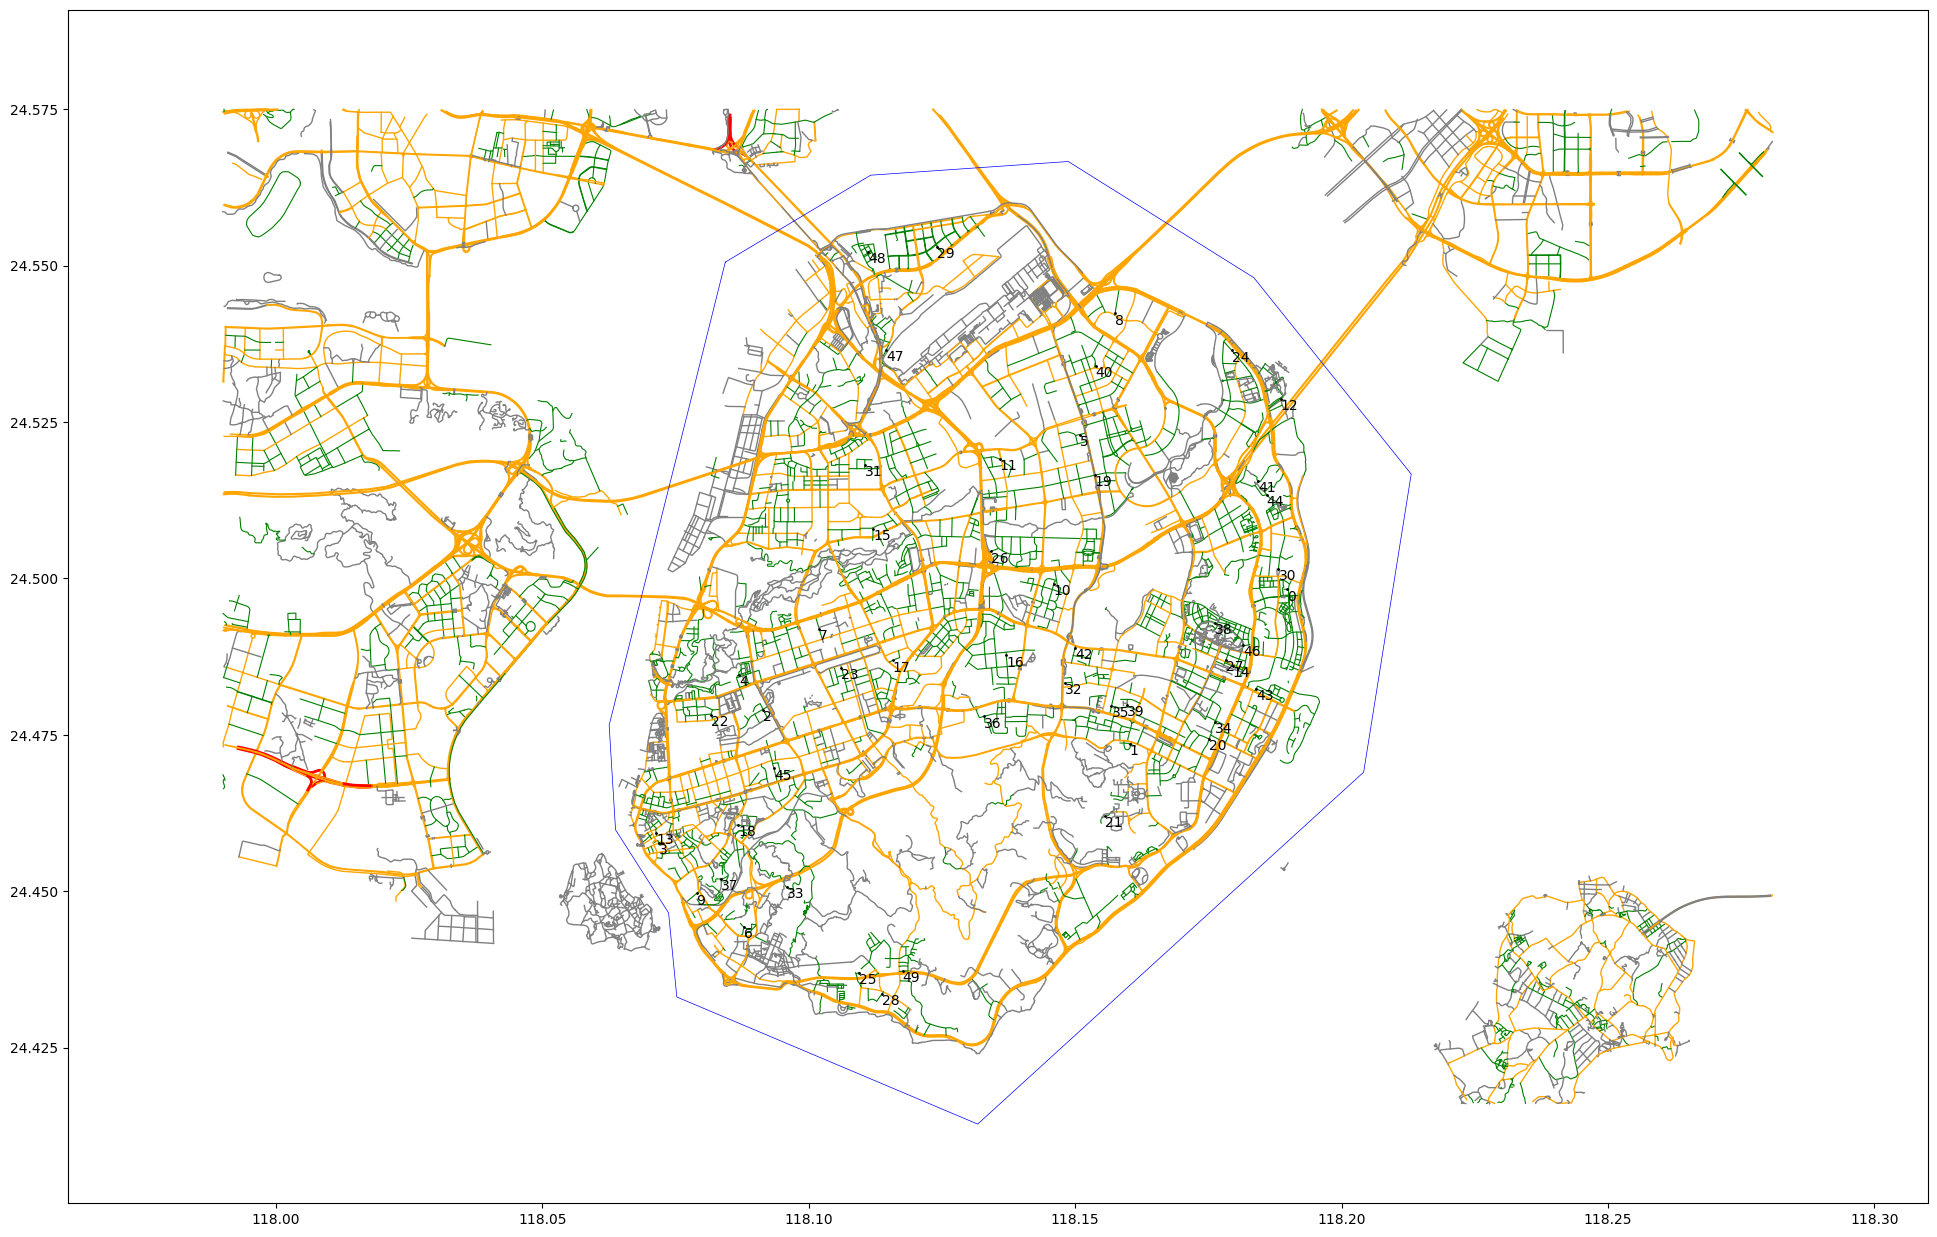

In [38]:
fig, ax = vrpSolver.plotRoadNetwork(
    roads = network,
    roadShowFlags = True,
    figSize = [24, 15.5])
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    nodeColor = 'black',
    xyReverseFlag = True)
# Plot the polygon where customers are created
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

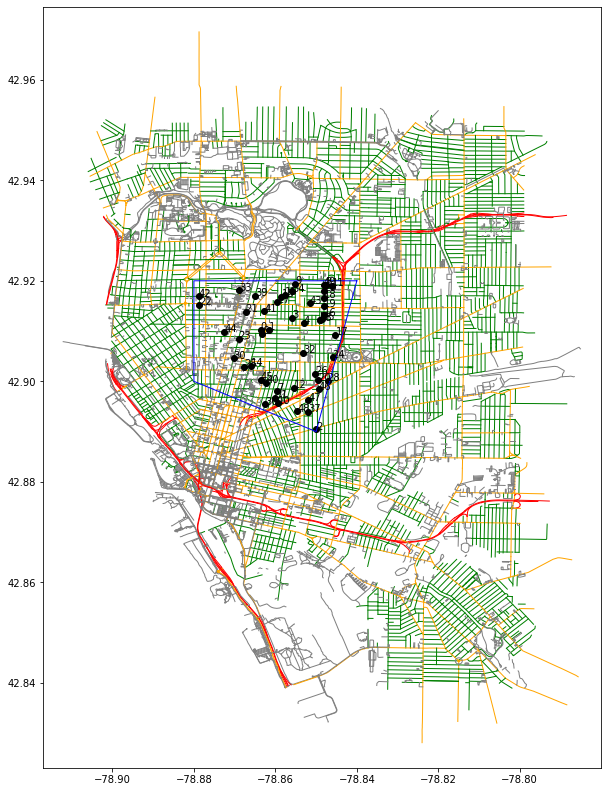

In [8]:
fig

#### 2.2 Inside a circle

In [10]:
centerLoc = [42.88, -78.84]
radius = 2000
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = {
        'method': "roadNetworkCircleLatLon",
        'roadNetwork': network['road'],
        'centerLatLon': centerLoc,
        'radiusInMeters': radius
    })

D:\Zoo\Hummingbird\vrpSolver\vrpSolver\instance.py:195: UserWarning: WARNING: Set `roadClass` to be default as ['residential']
  warnings.warn("WARNING: Set `roadClass` to be default as ['residential']")


In [11]:
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetwork = network,
    figSize = [10, 15]
)
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black',
    xyReverseFlag = True)
fig
# Plot polygon
poly = []
for i in range(36):
    poly.append(vrpSolver.ptInDistLatLon(centerLoc, i * 10, radius))
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

In [12]:
vrpSolver.plotRoadNetwork?